<a href="https://colab.research.google.com/github/edhillon7/Computer_Vision-/blob/main/PCA_EigenFaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python scikit-learn matplotlib seaborn numpy --quiet

import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


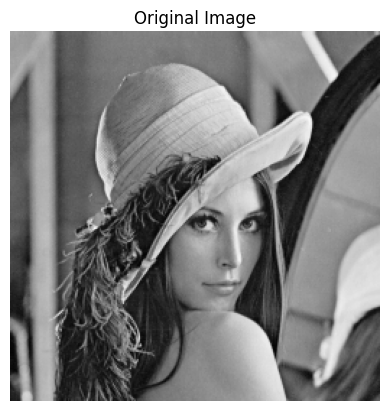

Original image shape: (256, 256)


In [2]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg -O lena.jpg
img = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))
img = img / 255.0  # normalize

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

print("Original image shape:", img.shape)

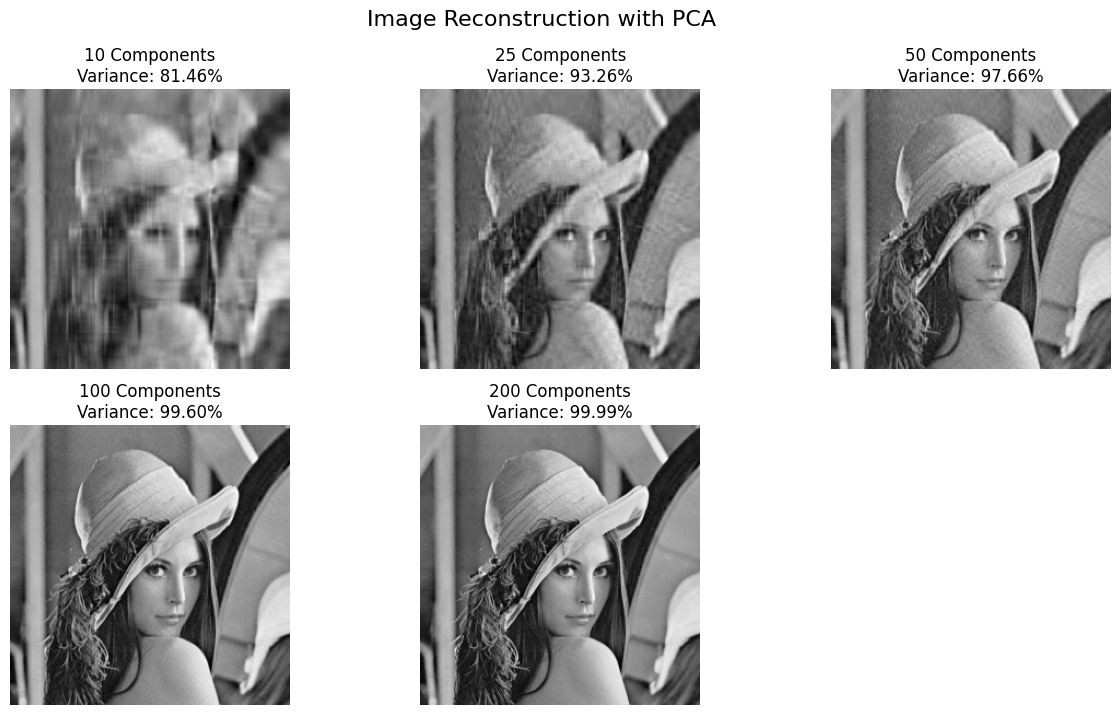

In [3]:
def apply_pca_and_reconstruct(image, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(image)
    reduced = pca.transform(image)
    reconstructed = pca.inverse_transform(reduced)
    variance = np.sum(pca.explained_variance_ratio_)
    return reconstructed, variance

components_list = [10, 25, 50, 100, 200]
plt.figure(figsize=(15, 8))

for i, n in enumerate(components_list, 1):
    reconstructed, variance = apply_pca_and_reconstruct(img, n)
    plt.subplot(2, 3, i)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f"{n} Components\nVariance: {variance*100:.2f}%")
    plt.axis('off')

plt.suptitle("Image Reconstruction with PCA", fontsize=16)
plt.show()


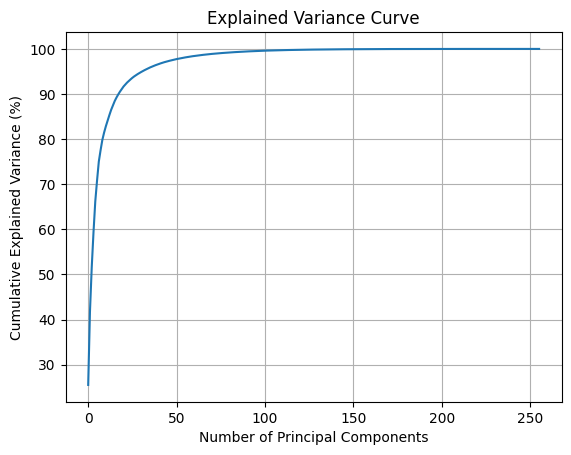

In [4]:
pca = PCA().fit(img)
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance Curve')
plt.grid(True)
plt.show()

In [5]:
print("\nDownloading LFW (Labeled Faces in the Wild) dataset...")
faces = fetch_lfw_people(min_faces_per_person=100)
X = faces.data
y = faces.target
target_names = faces.target_names

print(f"Dataset shape: {X.shape}")
print(f"Classes: {target_names}")

# Split train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


Dataset shape: (1140, 2914)
Classes: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [6]:
n_components = 100  # number of eigenfaces
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Original feature dimensions:", X_train.shape[1])
print("Reduced dimensions:", X_train_pca.shape[1])

Original feature dimensions: 2914
Reduced dimensions: 100


In [7]:
clf = SVC(kernel='rbf', class_weight='balanced', C=10, gamma='scale')
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Face Recognition Accuracy: {acc*100:.2f}%")



✅ Face Recognition Accuracy: 90.53%


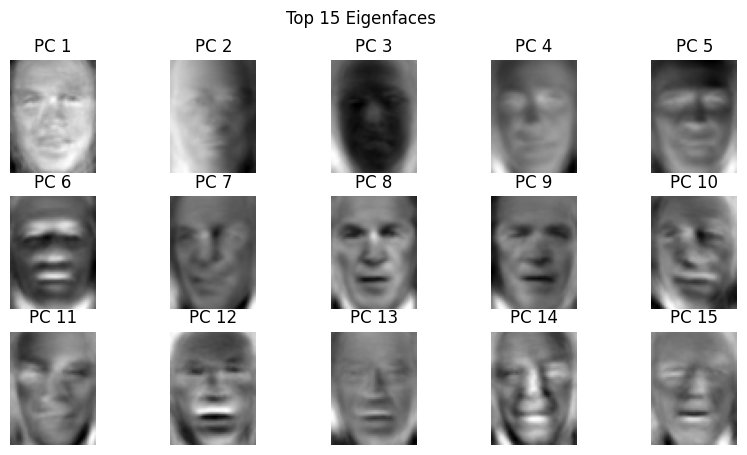

In [8]:
eigenfaces = pca.components_.reshape((n_components, faces.images.shape[1], faces.images.shape[2]))

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.title(f"PC {i+1}")
    plt.axis('off')
plt.suptitle("Top 15 Eigenfaces")
plt.show()

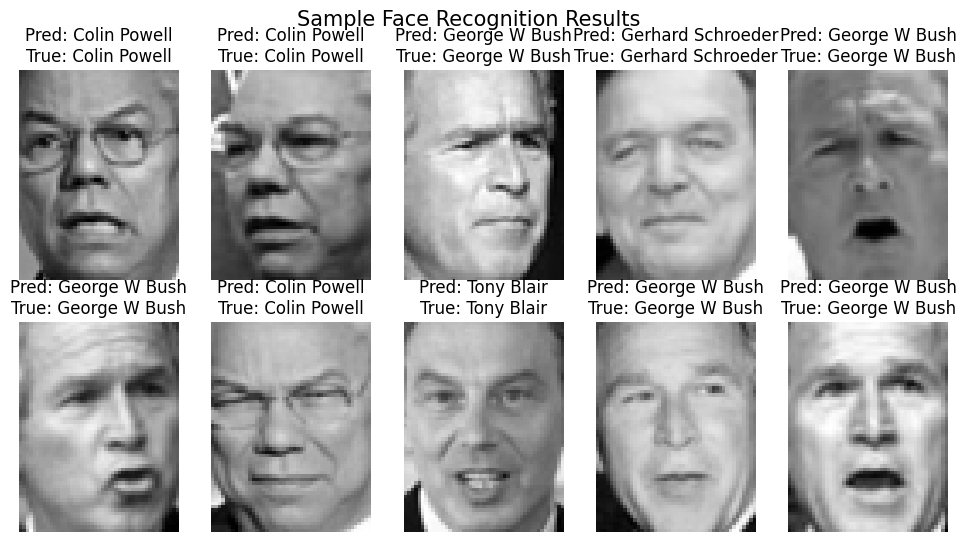

In [9]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='gray')
    plt.title(f"Pred: {target_names[y_pred[i]]}\nTrue: {target_names[y_test[i]]}")
    plt.axis('off')
plt.suptitle("Sample Face Recognition Results", fontsize=15)
plt.show()